In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize']=[16, 12]
plt.rcParams.update({'font.size': 18})

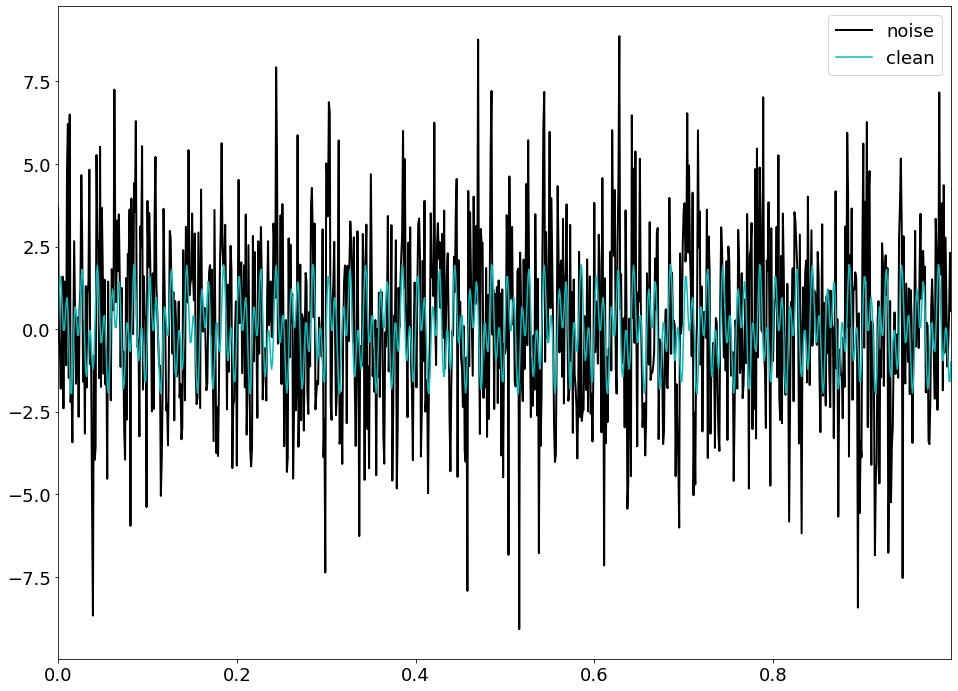

In [4]:
# creating two sine wave with noise
dt = 0.001
t = np.arange(0, 1, dt)
f1 = np.sin(2*np.pi*50*t)
f2 = np.sin(2*np.pi*120*t)
f_clean = f1 + f2
f_noise_added = f_clean + (2.5*np.random.randn(len(t)))

plt.plot(t, f_noise_added, color='k', LineWidth=2, label='noise')
plt.plot(t, f_clean, color='c', LineWidth=1.5, label='clean')

plt.xlim(t[0], t[-1])
plt.legend()

C:\Users\JAISON\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


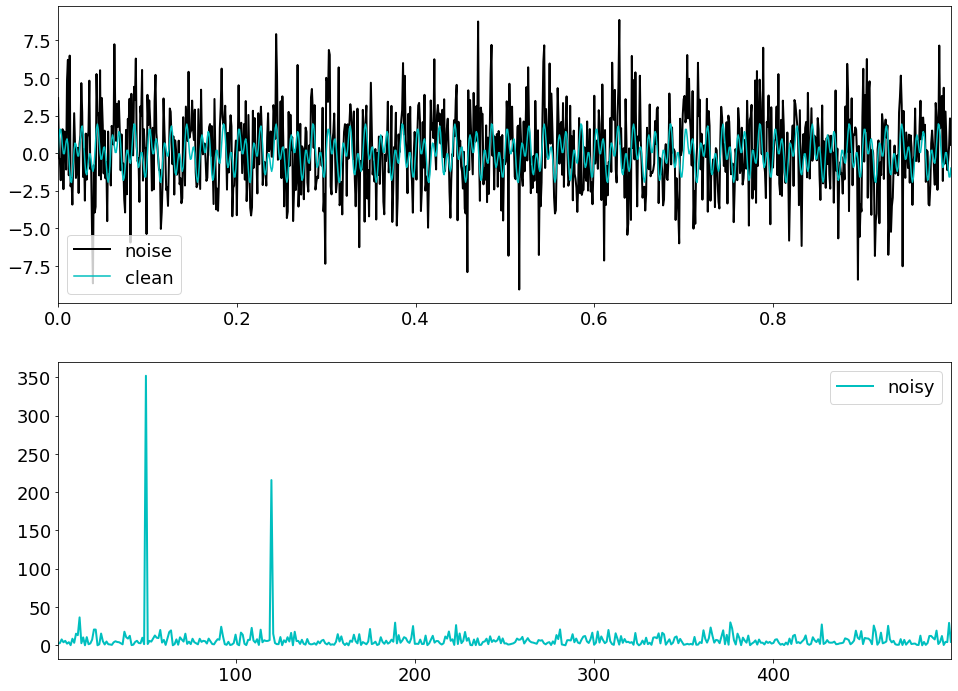

In [46]:
# compute the FFT
n = len(t)
fhat = np.fft.fft(f_noise_added, n)         # compute fft
PSD = fhat * np.conj(fhat)/ n               # power spectrum of each freq
freq = (1/(dt*n))*np.arange(n)              # create x-axis of frequency
L = np.arange(1, np.floor(n/2), dtype='int')  # only plot first half

fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, f_noise_added, color='k', LineWidth=2, label='noise')
plt.plot(t, f_clean, color='c', LineWidth=1.5, label='clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

C:\Users\JAISON\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JAISON\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JAISON\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


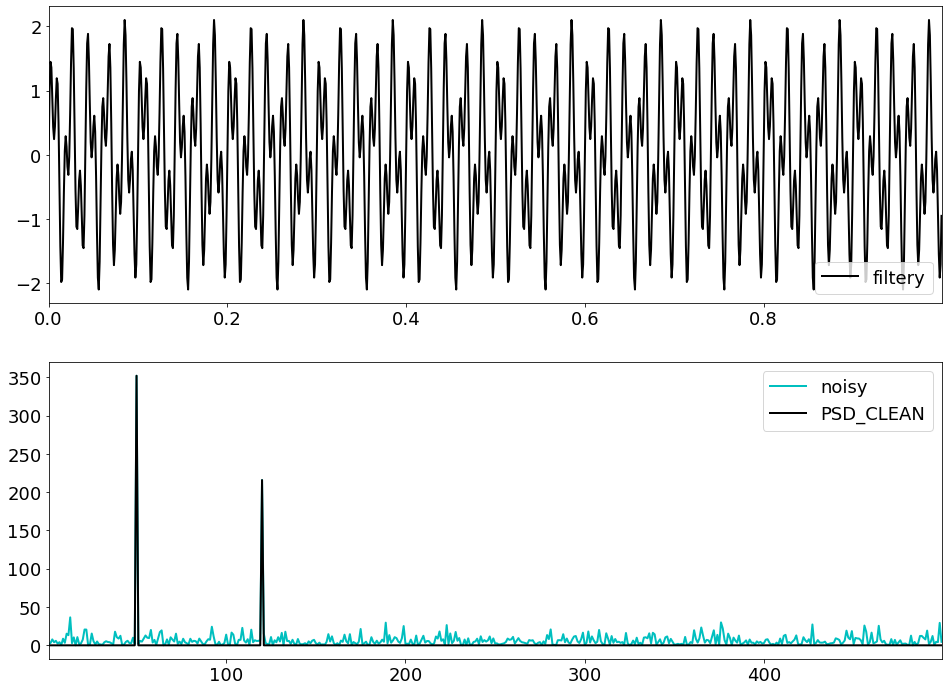

In [47]:
# Use the PSD to filter out noise
indices = PSD > 100
PSD_clean = indices * PSD
inverse_fft = np.fft.ifft(indices*fhat)


fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, inverse_fft, color='k', LineWidth=2, label='filtery')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='noisy')
plt.plot(freq[L], PSD_clean[L], color='k', LineWidth=2, label='PSD_CLEAN')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()